In [1]:
import seaborn as sns 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
X = df.drop(columns='time',axis=1)
y = df['time']

In [4]:
le =LabelEncoder()
y_encoded = le.fit_transform(y)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.3,random_state= 0)

In [6]:
to_encode = ['sex','smoker','day']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(drop='first'),to_encode)
    ],
    remainder= 'passthrough'
)

pipeline = Pipeline([
    ('preprocessing',preprocessor),
    ('classifier',GaussianNB())
])

In [7]:
pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'day'])])),
                ('classifier', GaussianNB())])

In [8]:
y_pred = pipeline.predict(X_test)

In [9]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=le.classes_))

0.918918918918919
[[55  1]
 [ 5 13]]
              precision    recall  f1-score   support

      Dinner       0.92      0.98      0.95        56
       Lunch       0.93      0.72      0.81        18

    accuracy                           0.92        74
   macro avg       0.92      0.85      0.88        74
weighted avg       0.92      0.92      0.92        74



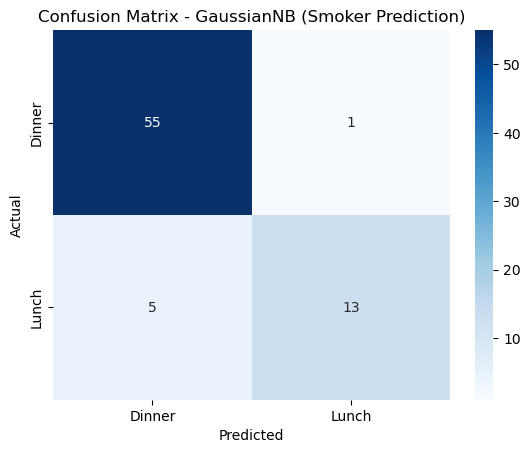

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GaussianNB (Smoker Prediction)")
plt.show()